In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
etf_nav_df = pd.read_csv('/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/processed data/NAV.csv')
etf_nav_df['navDate'] = pd.to_datetime(etf_nav_df['navDate'])
etf_nav_df.set_index('navDate', inplace=True)
etf_nav_df.index.name = 'Date'
etf_nav_df

,BILS,USFR,BIL,SGOV,IED,TLT
Date,,,,,,
2021-01-04,100.070350,25.106475,91.514454,100.015801,119.980988,157.692532
2021-01-05,100.070896,25.105846,91.513935,100.014627,119.649902,156.134543
2021-01-06,100.067845,25.105469,91.512743,100.014484,118.876441,152.696190
2021-01-07,100.065672,25.106960,91.512812,100.014396,118.605299,152.014162
2021-01-08,100.069879,25.107591,91.513138,100.014749,118.273899,151.475418
...,...,...,...,...,...,...
2024-05-26,99.321171,50.285369,91.749357,100.664438,92.795146,91.292031
2024-05-27,99.321171,50.285369,91.749357,100.664438,92.795146,91.292031
2024-05-28,99.332089,50.317386,91.761958,100.678521,92.336797,90.038392


In [24]:
etf_nav_df = pd.read_csv('/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/ETF/processed data/adjNAV.csv')
etf_nav_df['Date'] = pd.to_datetime(etf_nav_df['Date'])
etf_nav_df.set_index('Date', inplace=True)
etf_nav_df


,BILS,USFR,BIL,SGOV,IEF,TLT
Date,,,,,,
2021-01-04,91.310951,45.820358,83.783798,91.440651,111.501381,143.626083
2021-01-05,91.310951,45.820358,83.774673,91.440651,111.241150,142.559402
2021-01-06,91.310951,45.820358,83.783798,91.436089,110.590599,139.632935
2021-01-07,91.310951,45.838612,83.783798,91.440651,110.200333,138.402100
2021-01-08,91.306404,45.820358,83.774673,91.440651,109.884315,137.955429
...,...,...,...,...,...,...
2024-07-18,99.250000,50.430000,91.639999,100.550003,94.879997,93.470001
2024-07-19,99.290001,50.459999,91.669998,100.589996,94.580002,92.919998
2024-07-22,99.309998,50.459999,91.690002,100.610001,94.489998,92.650002


In [4]:
file_paths = {
    'FV1': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/FV-5 Year Note Futures/FV1 history.xlsx',
    'FV2': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/FV-5 Year Note Futures/FV2 history.xlsx',
    'SFR1': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/SFR-SOFR Futures/SFR1 history.xlsx',
    'SFR2': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/SFR-SOFR Futures/SFR2 history.xlsx',
    'SFR3': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/SFR-SOFR Futures/SFR3 history.xlsx',
    'SFR4': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/SFR-SOFR Futures/SFR4 history.xlsx',
    'SFR5': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/SFR-SOFR Futures/SFR5 history.xlsx',
    'TU1': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/TU-2 Year Note Futures/TU1 history.xlsx',
    'TU2': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/TU-2 Year Note Futures/TU2 history.xlsx',
    'TY1': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/TY-10 Year Note Futures/TY1 history.xlsx',
    'TY2': '/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/TY-10 Year Note Futures/TY2 history.xlsx',
    'US1':'/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/US1 history.xlsx',
    'US2':'/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/US2 history.xlsx',
    'WN':'/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/WN2 history.xlsx'
    
}

dataframes = {}
for name, path in file_paths.items():
    df = pd.read_excel(path)
    df = df[['Date', 'PX_LAST']].rename(columns={'PX_LAST': name})
    dataframes[name] = df

future_price_df = None
for name, df in dataframes.items():
    if future_price_df is None:
        future_price_df = df
    else:
        future_price_df = pd.merge(future_price_df, df, on='Date', how='outer')
        
future_price_df['Date'] = pd.to_datetime(future_price_df['Date'])
future_price_df = future_price_df.sort_values(by='Date')
future_price_df = future_price_df.set_index('Date', drop=True)
future_price_df.to_csv('/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/Future prices/Future prices.csv')

In [5]:
future_price_df

,FV1,FV2,SFR1,SFR2,SFR3,SFR4,SFR5,TU1,TU2,TY1,TY2,US1,US2,WN
Date,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,99.9350,NaN,99.955,99.945,99.940,NaN,NaN,NaN,137.203125,173.03125,171.59375,211.68750
2021-01-05,NaN,NaN,99.9275,NaN,99.950,99.940,99.935,NaN,NaN,NaN,136.906250,172.00000,170.56250,209.59375
2021-01-06,NaN,NaN,99.9200,NaN,99.935,99.930,99.925,NaN,NaN,NaN,136.250000,169.71875,168.09375,204.93750
2021-01-07,NaN,NaN,99.9250,NaN,99.940,99.930,99.920,NaN,NaN,NaN,136.000000,169.21875,167.59375,204.00000
2021-01-08,125.59375,125.492188,99.9250,99.94,99.940,99.930,99.925,110.445312,110.445312,136.65625,135.640625,168.75000,167.12500,203.15625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-08,NaN,NaN,94.6500,NaN,NaN,95.535,95.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,94.6475,NaN,NaN,95.525,95.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,94.6475,NaN,NaN,95.530,95.805,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
combined_data = pd.merge(etf_nav_df, future_price_df, left_index=True, right_index=True, how='left').dropna()
combined_data.to_csv('/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/combined_data.csv')
combined_data

,BILS,USFR,BIL,SGOV,IEF,TLT,FV1,FV2,SFR1,SFR2,SFR3,SFR4,SFR5,TU1,TU2,TY1,TY2,US1,US2,WN
Date,,,,,,,,,,,,,,,,,,,,
2021-01-08,91.306404,45.820358,83.774673,91.440651,109.884315,137.955429,125.593750,125.492188,99.9250,99.9400,99.940,99.930,99.925,110.445312,110.445312,136.656250,135.640625,168.75000,167.12500,203.15625
2021-01-11,91.310951,45.820358,83.783798,91.440651,109.670593,137.727539,125.515625,125.414062,99.9250,99.9400,99.940,99.930,99.925,110.433594,110.433594,136.421875,135.421875,168.34375,166.71875,202.59375
2021-01-12,91.306404,45.820358,83.774673,91.440651,109.652000,137.618103,125.484375,125.343750,99.9225,99.9350,99.935,99.925,99.920,110.425781,110.425781,136.390625,135.359375,168.18750,166.68750,202.25000
2021-01-13,91.306404,45.820358,83.774673,91.436089,110.033028,139.167908,125.617188,125.476562,99.9250,99.9400,99.940,99.930,99.925,110.425781,110.425781,136.765625,135.765625,169.37500,167.81250,204.90625
2021-01-14,91.310951,45.820358,83.783798,91.436089,109.782112,137.864258,125.578125,125.437500,99.9225,99.9350,99.940,99.930,99.930,110.429688,110.429688,136.562500,135.531250,168.21875,166.65625,202.75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,98.474335,50.083900,90.974991,99.803352,92.321945,90.780083,105.445312,105.835938,94.6500,94.6575,94.800,94.995,95.200,101.457031,101.796875,108.703125,109.015625,116.81250,116.96875,123.96875
2024-05-28,98.474335,50.093857,90.965080,99.813271,91.805069,89.478691,105.250000,105.632812,94.6475,94.6550,94.785,94.970,95.170,101.425781,101.761719,108.296875,108.609375,115.78125,115.87500,122.31250
2024-05-29,98.494156,50.103813,90.984901,99.813271,91.357780,88.395851,104.984375,105.335938,94.6500,94.6575,94.790,94.970,95.155,101.367188,101.691406,107.765625,108.062500,114.56250,114.62500,120.56250


In [26]:
combined_data['FV'] = np.where(combined_data['FV1'] > combined_data['FV2'], combined_data['FV1'], combined_data['FV2'])
combined_data = combined_data.drop(columns=['FV1', 'FV2'])

combined_data['SFR'] = combined_data[['SFR1', 'SFR2', 'SFR3', 'SFR4', 'SFR5']].max(axis=1)
combined_data = combined_data.drop(columns=['SFR1', 'SFR2', 'SFR3', 'SFR4', 'SFR5'])

combined_data['TU'] = np.where(combined_data['TU1'] > combined_data['TU2'], combined_data['TU1'], combined_data['TU2'])
combined_data = combined_data.drop(columns=['TU1', 'TU2'])

combined_data['TY'] = np.where(combined_data['TY1'] > combined_data['TY2'], combined_data['TY1'], combined_data['TY2'])
combined_data = combined_data.drop(columns=['TY1', 'TY2'])

combined_data['US'] = np.where(combined_data['US1'] > combined_data['US2'], combined_data['US1'], combined_data['US2'])
combined_data = combined_data.drop(columns=['US1', 'US2'])

combined_data

,BILS,USFR,BIL,SGOV,IEF,TLT,WN,FV,SFR,TU,TY,US
Date,,,,,,,,,,,,
2021-01-08,91.306404,45.820358,83.774673,91.440651,109.884315,137.955429,203.15625,125.593750,99.940,110.445312,136.656250,168.75000
2021-01-11,91.310951,45.820358,83.783798,91.440651,109.670593,137.727539,202.59375,125.515625,99.940,110.433594,136.421875,168.34375
2021-01-12,91.306404,45.820358,83.774673,91.440651,109.652000,137.618103,202.25000,125.484375,99.935,110.425781,136.390625,168.18750
2021-01-13,91.306404,45.820358,83.774673,91.436089,110.033028,139.167908,204.90625,125.617188,99.940,110.425781,136.765625,169.37500
2021-01-14,91.310951,45.820358,83.783798,91.436089,109.782112,137.864258,202.75000,125.578125,99.940,110.429688,136.562500,168.21875
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,98.474335,50.083900,90.974991,99.803352,92.321945,90.780083,123.96875,105.835938,95.200,101.796875,109.015625,116.96875
2024-05-28,98.474335,50.093857,90.965080,99.813271,91.805069,89.478691,122.31250,105.632812,95.170,101.761719,108.609375,115.87500
2024-05-29,98.494156,50.103813,90.984901,99.813271,91.357780,88.395851,120.56250,105.335938,95.155,101.691406,108.062500,114.62500


In [27]:
returns = combined_data.pct_change().dropna()
correlation_matrix = returns.corr()
print(correlation_matrix)

          BILS      USFR       BIL      SGOV       IEF       TLT        WN  \
BILS  1.000000  0.246045  0.592909  0.587379  0.369713  0.238765  0.236366   
USFR  0.246045  1.000000  0.334911  0.306472  0.045084  0.072184  0.064582   
BIL   0.592909  0.334911  1.000000  0.695029  0.040265  0.032246  0.025689   
SGOV  0.587379  0.306472  0.695029  1.000000  0.040466  0.037220  0.034667   
IEF   0.369713  0.045084  0.040265  0.040466  1.000000  0.909030  0.874238   
TLT   0.238765  0.072184  0.032246  0.037220  0.909030  1.000000  0.947236   
WN    0.236366  0.064582  0.025689  0.034667  0.874238  0.947236  1.000000   
FV    0.432034  0.019579  0.039388  0.051770  0.902836  0.713439  0.737132   
SFR   0.204349 -0.025937 -0.006680  0.050311  0.279542  0.169203  0.220467   
TU    0.484276  0.005464  0.055310  0.067620  0.744431  0.525321  0.542935   
TY    0.386845  0.030004  0.030546  0.041524  0.948843  0.810417  0.843767   
US    0.292042  0.053404  0.013209  0.031825  0.925666  0.921956

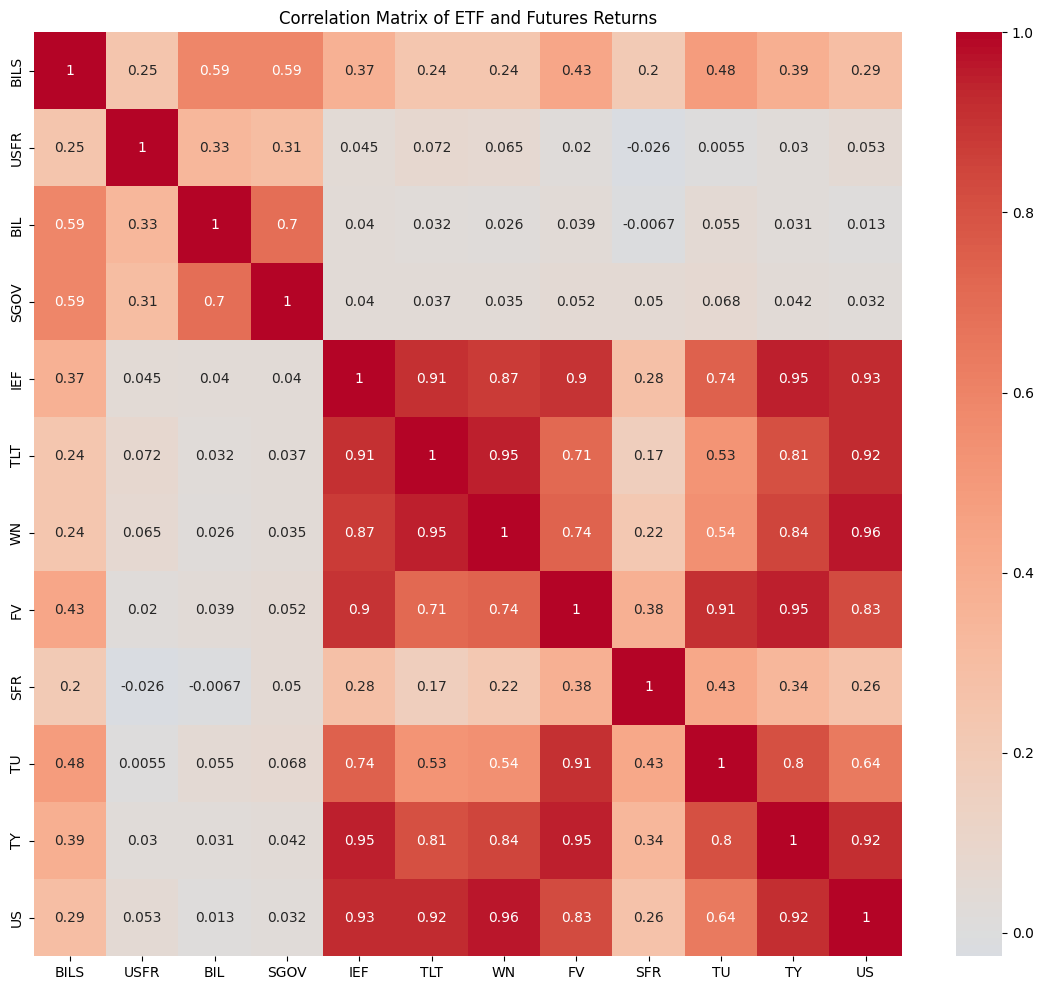

In [28]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of ETF and Futures Returns')

plt.savefig('correlation_matrix_high_res.png', dpi=300)

plt.show()

In [9]:
etf_returns = returns.iloc[:, :6]
future_returns = returns.iloc[:, 6:]

In [10]:
returns

,BILS,USFR,BIL,SGOV,IED,TLT,WN,FV,SFR,TU,TY,US
Date,,,,,,,,,,,,
2021-01-11,-0.000016,0.000008,-0.000007,0.000002,-0.002022,-0.002875,-0.002769,-0.000622,0.000000,-0.000106,-0.001715,-0.002407
2021-01-12,0.000005,-0.000025,-0.000004,0.000006,-0.000688,-0.001470,-0.001697,-0.000249,-0.000050,-0.000071,-0.000229,-0.000928
2021-01-13,-0.000026,0.000066,-0.000003,0.000004,0.003780,0.012519,0.013133,0.001058,0.000050,0.000000,0.002749,0.007061
2021-01-14,0.000030,-0.000079,0.000007,0.000004,-0.002304,-0.009711,-0.010523,-0.000311,0.000000,0.000035,-0.001485,-0.006827
2021-01-15,-0.000006,0.000023,-0.000007,0.000002,0.002408,0.003963,0.004007,0.001120,0.000000,0.000177,0.002174,0.003530
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,0.000111,-0.004342,0.000139,0.000142,-0.003852,-0.006358,-0.004769,-0.002282,-0.000735,-0.001111,-0.002715,-0.003726
2024-05-24,0.000568,0.000068,0.000572,0.000583,0.001116,0.002518,0.000504,-0.000369,-0.000210,-0.000422,-0.000143,0.000000
2024-05-28,0.000110,0.000637,0.000137,0.000140,-0.004939,-0.013732,-0.013360,-0.001919,-0.000315,-0.000345,-0.003727,-0.009351


In [11]:
Rf = pd.read_excel('/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/SOFR IR.xlsx')
Rf = Rf[['Effective Date', 'Rate (%)']].rename(columns={'Effective Date': 'Date', 'Rate (%)': 'Rf'})
Rf['Rf'] = Rf['Rf']/(100 * 252)
Rf['Date'] = pd.to_datetime(Rf['Date'])
Rf = Rf.sort_values(by='Date')
Rf = Rf.set_index('Date', drop=True)
Rf = Rf[Rf.index.isin(combined_data.index)]
returns = returns.join(Rf, how='left')
returns.to_csv('/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/retuns.csv')

/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


1. Volatility Analysis

In [12]:
etf_volatility = etf_returns.std() * np.sqrt(252)
future_volatility = future_returns.std() * np.sqrt(252)

print(f'ETF Annualized Volatility: \n{etf_volatility}\n')
print(f'Future Annualized Volatility: \n{future_volatility}')

ETF Annualized Volatility: 
BILS    0.009732
USFR    0.529853
BIL     0.009419
SGOV    0.009373
IED     0.082838
TLT     0.169277
dtype: float64

Future Annualized Volatility: 
WN     0.162004
FV     0.048800
SFR    0.016826
TU     0.023053
TY     0.068953
US     0.120905
dtype: float64


In [121]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    return result[1]

for dailyreturn in returns.columns:
    p_value = adf_test(returns[dailyreturn])
    if p_value < 0.05:
        print(f'ADF Test for {dailyreturn}: {p_value} (Stationary)')
    else:
        print(f'ADF Test for {dailyreturn}: {p_value} (Non-Stationary)')


ADF Test for BILS: 1.8342139220937784e-13 (Stationary)
ADF Test for IED: 0.0 (Stationary)
ADF Test for TLT: 0.0 (Stationary)
ADF Test for BIL: 2.8203619168540957e-15 (Stationary)
ADF Test for WN: 0.0 (Stationary)
ADF Test for FV: 0.0 (Stationary)
ADF Test for SFR: 0.0 (Stationary)
ADF Test for TU: 0.0 (Stationary)
ADF Test for TY: 0.0 (Stationary)
ADF Test for US: 0.0 (Stationary)


/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for BIL:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-02-10         FV    -0.000951     -0.398678
2021-02-11         FV    -0.002985     -0.381260
2021-02-12         FV    -0.003224     -0.347073
2021-02-16        SFR    -0.004274     -0.405249
2021-02-17        SFR     0.001227     -0.477286
...               ...          ...           ...
2024-05-23         US    -0.069158     -0.156137
2024-05-24         US    -0.074222     -0.136121
2024-05-28         US    -0.080050     -0.081046
2024-05-29         US    -0.075062     -0.193333
2024-05-30         WN    -0.043860     -0.235009

[833 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for BILS:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-02-10         FV    -0.007876      0.214619
2021-02-11         FV    -0.014547      0.236647
2021-02-12         FV    -0.014711      0.240372
2021-02-16        SFR    -0.089479      0.250659
2021-02-17        SFR    -0.018972      0.099988
...               ...          ...           ...
2024-05-23         US    -0.062864     -0.172634
2024-05-24         US    -0.067588     -0.153792
2024-05-28         US    -0.073280     -0.098007
2024-05-29         US    -0.066151     -0.182201
2024-05-30         WN    -0.040765     -0.241424

[833 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for IED:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-02-10         WN     0.288255      0.168175
2021-02-11         WN     0.290101      0.348925
2021-02-12         WN     0.289638      0.382435
2021-02-16         WN     0.296446      0.415789
2021-02-17         WN     0.341487      0.288533
...               ...          ...           ...
2024-05-23        SFR     9.260415      0.405088
2024-05-24        SFR     9.364708      0.439659
2024-05-28        SFR     9.506023      0.453105
2024-05-29        SFR     9.836631      0.275028
2024-05-30        SFR     9.468022      0.043181

[833 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for TLT:
           Best Asset  Hedge Ratio  Sharpe Ratio
Date                                            
2021-02-10         WN     0.934432     -0.041759
2021-02-11         WN     0.946245      0.045293
2021-02-12         WN     0.951836     -0.006163
2021-02-16         WN     0.973151     -0.037719
2021-02-17         WN     0.941718     -0.027478
...               ...          ...           ...
2024-05-23        SFR    14.690250      0.402497
2024-05-24        SFR    14.785719      0.469782
2024-05-28        SFR    14.854409      0.484367
2024-05-29        SFR    15.882859      0.250266
2024-05-30        SFR    15.072925      0.047321

[833 rows x 3 columns]


      Cumulative Return  Total Excess Return  Daily Volatility  Sharpe Ratio
BIL            0.003255            -0.083188          0.000640     -0.157426
BILS          -0.005807            -0.092499          0.000669     -0.167344
IED            0.140349             0.048151          0.005715      0.010200

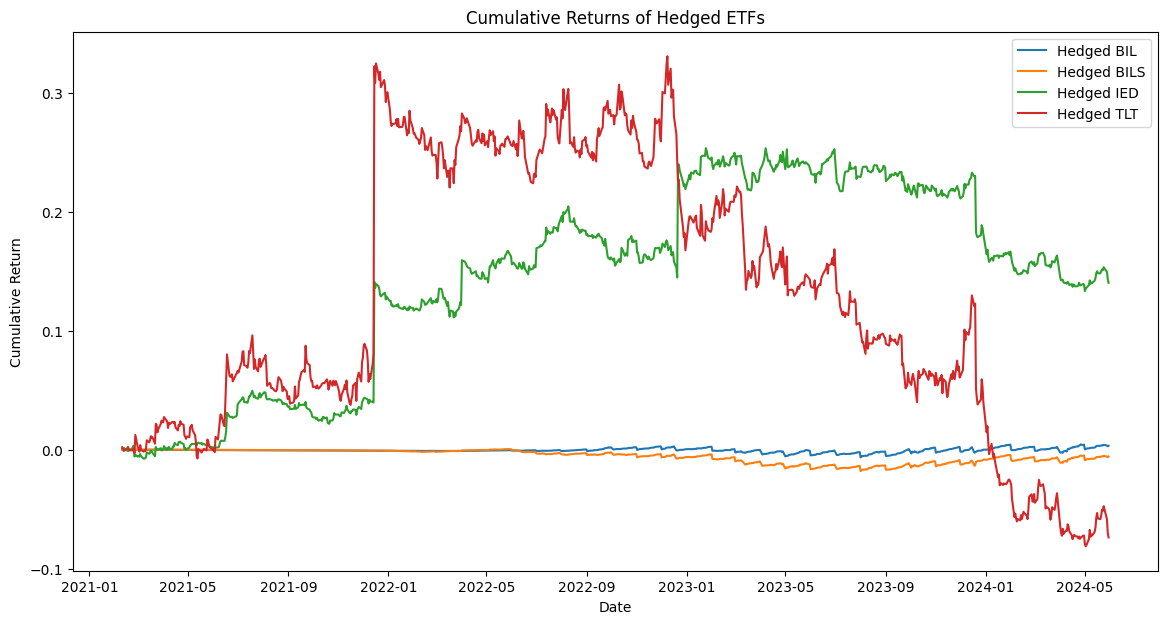

In [164]:
futures = ['FV', 'SFR', 'TU', 'TY', 'US', 'WN']
etfs = ['BILS', 'USFR', 'BIL', 'SGOV', 'IED', 'TLT']
window_size = 21  # 设定滚动窗口大小，例如252天

# 初始化存储对冲后收益率的DataFrame
hedged_returns = pd.DataFrame(index=returns.index)

# 计算滚动窗口内的对冲比率并应用对冲策略
for etf in etfs:
    best_assets = []
    best_hedge_ratios = []
    rolling_sharpe_ratios = []
    
    for i in range(window_size, len(returns)):
        best_asset = None
        best_hedge_ratio = None
        best_sharpe_ratio = float('-inf')
        
        window_returns = returns.iloc[i-window_size:i]
        
        for asset in futures:
            if etf != asset:
                X = sm.add_constant(window_returns[asset])
                model = sm.OLS(window_returns[etf], X).fit()
                hedge_ratio = model.params[1]
                hedged_returns_window = window_returns[etf] - hedge_ratio * window_returns[asset]
                
                # 将 hedged_returns_window 和 Rf 对齐
                hedged_returns_window = hedged_returns_window - window_returns['Rf']
                
                excess_returns = hedged_returns_window
                daily_volatility = excess_returns.std()
                
                # 计算日均超额收益
                mean_excess_return = np.mean(excess_returns)
                if daily_volatility != 0:  # 避免除以零
                    sharpe_ratio = mean_excess_return / daily_volatility
                else:
                    sharpe_ratio = float('-inf')
                
                if sharpe_ratio > best_sharpe_ratio:
                    best_sharpe_ratio = sharpe_ratio
                    best_hedge_ratio = hedge_ratio
                    best_asset = asset
        
        best_assets.append(best_asset)
        best_hedge_ratios.append(best_hedge_ratio)
        rolling_sharpe_ratios.append(best_sharpe_ratio)
        hedged_returns.loc[returns.index[i], etf] = returns.loc[returns.index[i], etf] - best_hedge_ratio * returns.loc[returns.index[i], best_asset]


    optimal_hedge_ratios = pd.DataFrame({
        'Best Asset': best_assets,
        'Hedge Ratio': best_hedge_ratios,
        'Sharpe Ratio': rolling_sharpe_ratios
    }, index=returns.index[window_size:])
    
    print(f'Optimal Hedge Ratios for {etf}:')
    print(optimal_hedge_ratios)
    print('\n')

# 计算策略表现指标
def calculate_performance(returns, rf):
    cumulative_return = (1 + returns).cumprod() - 1
    excess_returns = returns - rf
    total_excess_return = excess_returns.sum()
    mean_excess_return = excess_returns.mean()
    daily_volatility = excess_returns.std()
    sharpe_ratio = mean_excess_return / daily_volatility if daily_volatility != 0 else float('-inf')
    return cumulative_return, total_excess_return, daily_volatility, sharpe_ratio

performance_metrics = {}
rf_series = returns['Rf']

for etf in hedged_returns.columns:
    hedged_etf_returns = hedged_returns[etf].dropna()
    rf_for_period = rf_series.loc[hedged_etf_returns.index]
    cumulative_return, total_excess_return, daily_volatility, sharpe_ratio = calculate_performance(hedged_etf_returns, rf_for_period)
    performance_metrics[etf] = {
        'Cumulative Return': cumulative_return[-1],
        'Total Excess Return': total_excess_return,
        'Daily Volatility': daily_volatility,
        'Sharpe Ratio': sharpe_ratio
    }

performance_df = pd.DataFrame(performance_metrics).T
print(performance_df)

# 可视化累计收益
plt.figure(figsize=(14, 7))
for etf in hedged_returns.columns:
    cumulative_return = (1 + hedged_returns[etf].dropna()).cumprod() - 1
    plt.plot(cumulative_return, label=f'Hedged {etf}')

plt.title('Cumulative Returns of Hedged ETFs')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for BIL:
           Best Asset  Hedge Ratio      Variance
Date                                            
2021-01-19         US    -0.000637  1.948361e-11
2021-01-20         TY    -0.002440  1.466067e-11
2021-01-21         TY    -0.002553  1.792665e-11
2021-01-22         US    -0.001548  2.894283e-11
2021-01-25         US    -0.003090  2.514651e-11
...               ...          ...           ...
2024-05-23         WN    -0.027990  3.452265e-09
2024-05-24         WN    -0.021107  6.900717e-09
2024-05-28         TY     0.030998  2.764621e-08
2024-05-29         TY     0.033097  2.617138e-08
2024-05-30         FV     0.184720  7.125647e-09

[849 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for BILS:
           Best Asset  Hedge Ratio      Variance
Date                                            
2021-01-19         WN    -0.002068  1.131139e-10
2021-01-20         US    -0.003852  1.383231e-11
2021-01-21         US    -0.003845  2.530775e-11
2021-01-22         US    -0.002735  8.789033e-11
2021-01-25        SFR    -0.137592  2.195453e-11
...               ...          ...           ...
2024-05-23         WN    -0.024520  4.712453e-09
2024-05-24         WN    -0.017310  8.149330e-09
2024-05-28         TY     0.044798  2.701068e-08
2024-05-29         TY     0.043812  2.546516e-08
2024-05-30         FV     0.186840  9.268949e-09

[849 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for IED:
           Best Asset  Hedge Ratio      Variance
Date                                            
2021-01-19         TY     1.310087  8.618043e-08
2021-01-20         TY     1.387199  4.091019e-08
2021-01-21         TY     1.362335  4.827504e-08
2021-01-22         TY     1.298456  3.125862e-08
2021-01-25         TY     1.222352  2.062869e-08
...               ...          ...           ...
2024-05-23         TY     1.292299  1.288587e-07
2024-05-24         TY     1.396639  2.478059e-07
2024-05-28         TY     1.505246  3.100284e-07
2024-05-29         TY     1.528219  2.439367e-07
2024-05-30         TY     1.341913  6.065485e-07

[849 rows x 3 columns]




/Users/liyihan/Desktop/Work/ASL/ETF Hedging Data/myenv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimal Hedge Ratios for TLT:
           Best Asset  Hedge Ratio      Variance
Date                                            
2021-01-19         WN     0.944931  3.023927e-08
2021-01-20         WN     0.942616  4.762101e-08
2021-01-21         WN     0.933020  1.542403e-07
2021-01-22         WN     0.990910  3.408688e-07
2021-01-25         WN     1.024257  3.373757e-07
...               ...          ...           ...
2024-05-23         US     1.662505  1.640406e-07
2024-05-24         US     1.747459  4.521890e-07
2024-05-28         WN     1.460707  2.899466e-07
2024-05-29         US     1.681848  8.448985e-07
2024-05-30         WN     0.981848  2.411813e-06

[849 rows x 3 columns]


      Cumulative Return  Total Excess Return  Daily Volatility  Sharpe Ratio
BIL            0.066713            -0.018158          0.002027     -0.010640
BILS           0.060818            -0.023371          0.002208     -0.012570
IED           -0.033272            -0.128351          0.002986     -0.051055

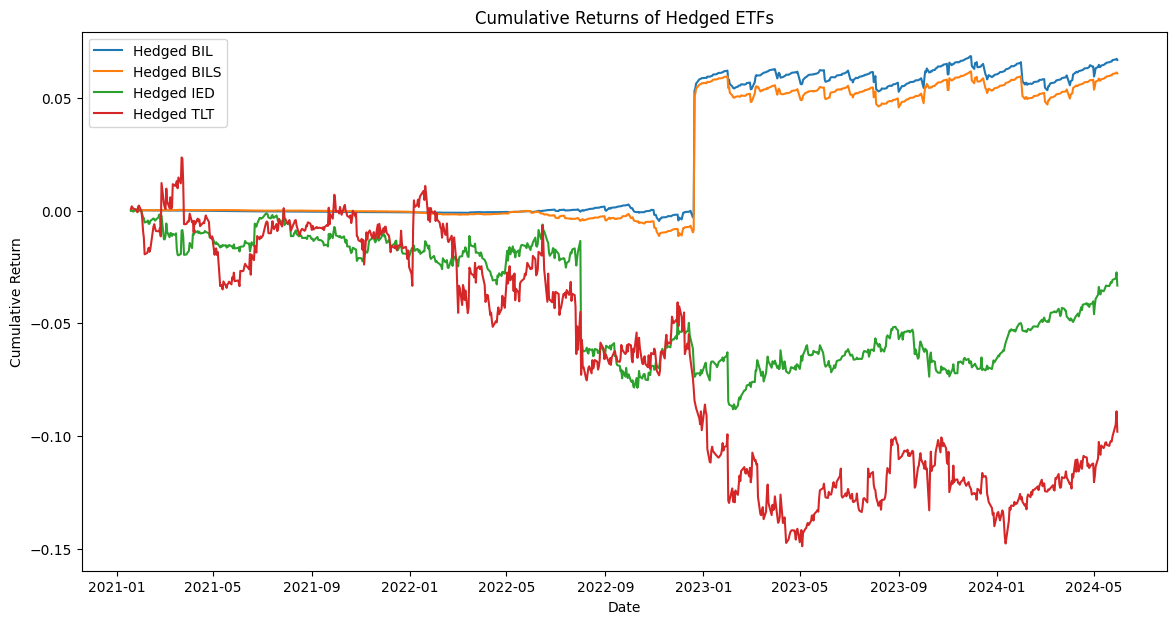

In [161]:
# 假设前面已经导入了 pandas, numpy, statsmodels.api as sm, matplotlib.pyplot as plt 并定义了 returns 数据

futures = ['FV', 'SFR', 'TU', 'TY', 'US', 'WN']
etfs = ['BIL', 'BILS', 'IED', 'TLT']
window_size = 5  # 设定滚动窗口大小，例如21天

# 初始化存储对冲后收益率的DataFrame
hedged_returns = pd.DataFrame(index=returns.index)

# 计算滚动窗口内的对冲比率并应用对冲策略
for etf in etfs:
    best_assets = []
    best_hedge_ratios = []
    rolling_variances = []
    
    for i in range(window_size, len(returns)):
        best_asset = None
        best_hedge_ratio = None
        best_variance = float('inf')
        
        window_returns = returns.iloc[i-window_size:i]
        
        for asset in futures:
            if etf != asset:
                X = sm.add_constant(window_returns[asset])
                model = sm.OLS(window_returns[etf], X).fit()
                hedge_ratio = model.params[1]
                hedged_returns_window = window_returns[etf] - hedge_ratio * window_returns[asset]
                
                # 将 hedged_returns_window 和 Rf 对齐
                hedged_returns_window = hedged_returns_window - window_returns['Rf']
                
                variance = np.var(hedged_returns_window)
                
                if variance < best_variance:
                    best_variance = variance
                    best_hedge_ratio = hedge_ratio
                    best_asset = asset
        
        best_assets.append(best_asset)
        best_hedge_ratios.append(best_hedge_ratio)
        rolling_variances.append(best_variance)
        hedged_returns.loc[returns.index[i], etf] = returns.loc[returns.index[i], etf] - best_hedge_ratio * returns.loc[returns.index[i], best_asset]

    optimal_hedge_ratios = pd.DataFrame({
        'Best Asset': best_assets,
        'Hedge Ratio': best_hedge_ratios,
        'Variance': rolling_variances
    }, index=returns.index[window_size:])
    
    print(f'Optimal Hedge Ratios for {etf}:')
    print(optimal_hedge_ratios)
    print('\n')


performance_metrics = {}

for etf in hedged_returns.columns:
    hedged_etf_returns = hedged_returns[etf].dropna()
    rf_for_period = rf_series.loc[hedged_etf_returns.index]
    cumulative_return, total_excess_return, daily_volatility, sharpe_ratio = calculate_performance(hedged_etf_returns, rf_for_period)
    performance_metrics[etf] = {
        'Cumulative Return': cumulative_return[-1],
        'Total Excess Return': total_excess_return,
        'Daily Volatility': daily_volatility,
        'Sharpe Ratio': sharpe_ratio
    }

performance_df = pd.DataFrame(performance_metrics).T
print(performance_df)

# 可视化累计收益
plt.figure(figsize=(14, 7))
for etf in hedged_returns.columns:
    cumulative_return = (1 + hedged_returns[etf].dropna()).cumprod() - 1
    plt.plot(cumulative_return, label=f'Hedged {etf}')

plt.title('Cumulative Returns of Hedged ETFs')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
